In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [32]:
df = pd.read_csv('revenue_cleaned.csv')
melted = pd.melt(df, id_vars=['Cust_ID','Product Group'], var_name="Month", value_name="Revenue")

In [33]:
melted['Year']=melted['Month'].str.split(pat='/', expand=True)[2]
# melted.to_csv('melted_ff.csv', index=False)

In [34]:
melted['Month'] = pd.to_datetime(melted['Month'], format='%m/%d/%Y')
melted.dtypes

Cust_ID                  object
Product Group            object
Month            datetime64[ns]
Revenue                 float64
Year                     object
dtype: object

In [105]:
melted = melted.sort_values(by='Month', ascending=True)
melted.head()

,Cust_ID,Product Group,Month,Revenue,Year
0,CUSTOMER 1,FraudFinder 2.0.,2010-01-01,172.24,2010
19,CUSTOMER 17,FraudFinder 2.0.,2010-01-01,389.77,2010
2904,CUSTOMER 2044,FraudFinder,2010-01-01,64.60,2010
1,CUSTOMER 2,FraudFinder,2010-01-01,90.81,2010
2,CUSTOMER 3,FraudFinder 2.0.,2010-01-01,153.54,2010


In [36]:
grouped = melted.groupby(['Product Group','Year']).sum()

In [37]:
grouped['pct_pop'] = grouped['Revenue'].pct_change()
# grouped['pct_yoy'] = grouped['Revenue'].pct_change(12)
grouped

Revenue   pct_pop
Product Group    Year                       
FraudFinder      2010   5500746.37       NaN
                 2011   4630352.42 -0.158232
                 2012   3436589.65 -0.257813
                 2013   1557334.17 -0.546837
FraudFinder 2.0. 2010   6956933.07  3.467206
                 2011   9496831.72  0.365089
                 2012  12131920.97  0.277470
                 2013   6674236.73 -0.449862
Other            2010    518072.34 -0.922377
                 2011    744834.01  0.437703
                 2012   1270390.13  0.705602
                 2013    892198.81 -0.297697

In [38]:
ff_sorted = sorted_df.loc[sorted_df['Product Group']=='FraudFinder']
ff2_sorted = sorted_df.loc[sorted_df['Product Group']=='FraudFinder 2.0.']
other_sorted = sorted_df.loc[sorted_df['Product Group']=='Other']

In [39]:
ff_sum = ff_sorted.groupby(['Cust_ID','Year'])['Revenue'].sum().reset_index()
ff_sum = ff_sum.sort_values(by='Revenue', ascending=False)
ff2_sum = ff2_sorted.groupby(['Cust_ID','Year'])['Revenue'].sum().reset_index()
ff2_sum = ff2_sum.sort_values(by='Revenue', ascending=False)
other_sum = other_sorted.groupby(['Cust_ID','Year'])['Revenue'].sum().reset_index()
other_sum = other_sum.sort_values(by='Revenue', ascending=False)


In [40]:
ff_sum = ff_sum.loc[ff_sum.Revenue !=0]
ff2_sum = ff2_sum.loc[ff2_sum.Revenue !=0]
other_sum = other_sum.loc[other_sum.Revenue !=0]

In [65]:
ff_sum['Product'] = 'FraudFinder'
ff2_sum['Product'] = 'FraudFinder 2.0.'
other_sum['Product'] = 'Other'

In [66]:
df1 = ff_sum.append(ff2_sum)

In [67]:
df1 = df1.append(other_sum)

In [115]:
df1.sort_values(['Year','Revenue'])
df1

,Cust_ID,Year,Revenue,Product
1461,CUSTOMER 1550,2011,117702.36,FraudFinder
1460,CUSTOMER 1550,2010,100023.64,FraudFinder
9532,CUSTOMER 774,2010,90375.80,FraudFinder
1850,CUSTOMER 1697,2012,49151.55,FraudFinder
1848,CUSTOMER 1697,2010,47952.72,FraudFinder
1849,CUSTOMER 1697,2011,47952.72,FraudFinder
3752,CUSTOMER 239,2010,46161.40,FraudFinder
6122,CUSTOMER 3278,2012,43307.08,FraudFinder
6121,CUSTOMER 3278,2011,43307.06,FraudFinder
6120,CUSTOMER 3278,2010,41994.74,FraudFinder


In [68]:
y2011 = df1.loc[df1.Year=='2011']
top50_2011 = y2011[0:50]

In [45]:
transmax = pd.read_csv('usage_cleaned.csv')
len(transmax)

5258

In [104]:
outliers = transmax[transmax['# Transactions'] > transmax['# Transactions'].mean() + 3 * transmax['# Transactions'].std()]
outliers.Customer.unique()

array(['CUSTOMER 184', 'CUSTOMER 284', 'CUSTOMER 3040', 'CUSTOMER 3542',
       'CUSTOMER 3585', 'CUSTOMER 4038', 'CUSTOMER 319', 'CUSTOMER 774',
       'CUSTOMER 1773', 'CUSTOMER 2812'], dtype=object)

In [47]:
transmax2 = transmax[np.abs(transmax['# Transactions']-transmax['# Transactions'].mean()) <= (3*transmax['# Transactions'].std())]
transmax2.describe()

,# Transactions,Year
count,5.242000e+03,5242.000000
mean,5.220290e+05,2011.123998
std,2.092819e+06,0.802757
min,0.000000e+00,2010.000000
25%,5.400000e+01,2010.000000
50%,1.662100e+04,2011.000000
75%,1.883610e+05,2012.000000
max,3.708062e+07,2012.000000


In [48]:
transmax2.loc[transmax2.Year==2011].sort_values("# Transactions", ascending=True)\
        [0:10]['# Transactions'].mean()

0.0

In [49]:
transmax_nonull = transmax2.loc[transmax2['# Transactions']!=0]

In [50]:
years = transmax_nonull.Year.unique()
years

array([2010, 2011, 2012])

In [106]:
def top50(n, adf, asc, avg_tx):
    years = transmax_nonull.Year.unique()
    if asc == True:
        sort = 'Bottom'
    else:
        sort = 'Top'
    for item in years:
        cust = transmax_nonull.loc[transmax_nonull.Year==item].sort_values('# Transactions', ascending=asc)\
        [0:n].sort_values('# Transactions', ascending=asc)['Customer'].values
        
        selected = melted.loc[melted['Year']==str(item)]
        
        adf[f'{item} {sort} {n}'] = selected.loc[selected['Cust_ID'].isin(cust)].groupby('Product Group')['Revenue'].mean()
    
        avg_tx.append(transmax_nonull.loc[transmax_nonull.Year==item].sort_values("# Transactions", ascending=asc)\
        [0:n]['# Transactions'].mean())


In [107]:
def revbyrank(adf, avg_tx):
    ranks = [10, 50, 100, 250]
    cond = [True, False]
    for con in cond:
        for item in ranks:
            top50(item, adf, con, avg_tx)
        

In [108]:
adf = pd.DataFrame(columns=['2010 Bottom 10', '2011 Bottom 10', '2012 Bottom 10', '2010 Bottom 50', '2011 Bottom 50', '2012 Bottom 50', '2010 Bottom 100', '2011 Bottom 100', '2012 Bottom 100', '2010 Bottom 250', '2011 Bottom 250', '2012 Bottom 250', '2010 Top 10', '2011 Top 10', '2012 Top 10', '2010 Top 50', '2011 Top 50', '2012 Top 50', '2010 Top 100', '2011 Top 100', '2012 Top 100', '2010 Top 250', '2011 Top 250', '2012 Top 250'])
avg_tx = []
revbyrank(adf, avg_tx)

In [109]:
b10 = adf[['2010 Bottom 10', '2011 Bottom 10', '2012 Bottom 10']].mean(axis=1)
b50 = adf[['2010 Bottom 50', '2011 Bottom 50', '2012 Bottom 50']].mean(axis=1)
b100 = adf[['2010 Bottom 100', '2011 Bottom 100', '2012 Bottom 100']].mean(axis=1)
b250 = adf[['2010 Bottom 250', '2011 Bottom 250', '2012 Bottom 250']].mean(axis=1)
t10 = adf[['2010 Top 10', '2011 Top 10', '2012 Top 10']].mean(axis=1)
t50 = adf[['2010 Top 50', '2011 Top 50', '2012 Top 50']].mean(axis=1)
t100 = adf[['2010 Top 100', '2011 Top 100', '2012 Top 100']].mean(axis=1)
t250 = adf[['2010 Top 250', '2011 Top 250', '2012 Top 250']].mean(axis=1)

In [110]:
df2= pd.concat([b10, b50, b100, b250, t10, t50, t100, t250], axis=1, names=['Bottom 10', 'Bottom 50', 'Bottom 100','Bottom 250','Top 10', 'Top 50', 'Top 100', 'Top 250'])
df2 = df2.rename(columns={0:'Bottom 10', 1:'Bottom 50', 2:'Bottom 100',3:'Bottom 250',4:'Top 10', 5:'Top 50', 6:'Top 100',7:'Top 250'})
df2

,Bottom 10,Bottom 50,Bottom 100,Bottom 250,Top 10,Top 50,Top 100,Top 250
Product Group,,,,,,,,
FraudFinder,45.141991,94.650608,86.165160,88.065555,644.822907,288.460731,198.403461,142.985849
FraudFinder 2.0.,154.234056,176.501050,221.166120,189.644737,1150.038306,914.724842,802.893793,550.058903
Other,16.601667,-0.787367,85.623542,33.985631,247.330000,115.271497,85.083336,101.656266


In [111]:
df2 = df2.transpose()
len(df2)

8

In [112]:
arr = np.arange(0, len(avg_tx)+3, 3)
sets = []
for i in range(len(arr)-1):
    sets.append(np.mean(avg_tx[arr[i]:arr[i+1]]))
df2['Mean Transaction Max'] = sets
df2

Product Group,FraudFinder,FraudFinder 2.0.,Other,Mean Transaction Max
Bottom 10,45.141991,154.234056,16.601667,1.066667e+00
Bottom 50,94.650608,176.501050,-0.787367,3.326667e+00
Bottom 100,86.165160,221.166120,85.623542,9.810000e+00
Bottom 250,88.065555,189.644737,33.985631,1.181240e+02
Top 10,644.822907,1150.038306,247.330000,2.152162e+07
Top 50,288.460731,914.724842,115.271497,9.955542e+06
Top 100,198.403461,802.893793,85.083336,6.508092e+06
Top 250,142.985849,550.058903,101.656266,3.251419e+06


/Users/laura/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


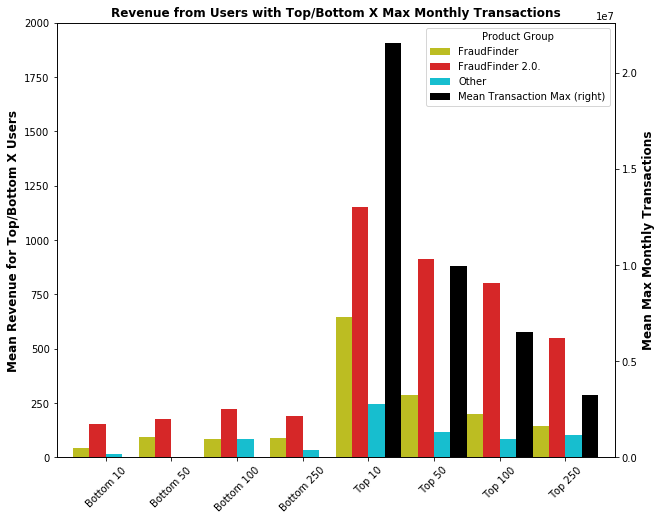

In [114]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'ylim':(0,2000)})
ax = df2.plot(ax=ax, secondary_y=['Mean Transaction Max'], kind='bar', figsize=(10,8), legend=True, colors=['tab:olive','tab:red','tab:cyan','black'], rot=45, width=1)
ax.right_ax.set_ylabel('Mean Max Monthly Transactions', fontsize=12, fontweight='bold')
ax.set_ylabel("Mean Revenue for Top/Bottom X Users", fontsize=12, fontweight='bold')
plt.xlabel('Revenue from Top/Bottom X Users per Year', fontsize=12, fontweight='bold')
plt.title('Revenue from Users with Top/Bottom X Max Monthly Transactions', fontsize=12, fontweight='bold')

plt.savefig('./revenue_summary2.png',transparent=False, dpi=80, bbox_inches="tight")

In [79]:
df3 = df1.merge(transmax2, left_on=['Cust_ID'], right_on=['Customer'])
df3.head()

,Cust_ID,Year_x,Revenue,Product,Customer,# Transactions,Year_y
0,CUSTOMER 774,2010,90375.80,FraudFinder,CUSTOMER 774,192,2011
1,CUSTOMER 774,2012,19028.85,FraudFinder,CUSTOMER 774,192,2011
2,CUSTOMER 774,2011,15838.20,FraudFinder,CUSTOMER 774,192,2011
3,CUSTOMER 774,2013,11811.00,FraudFinder,CUSTOMER 774,192,2011
4,CUSTOMER 774,2012,139199.66,FraudFinder 2.0.,CUSTOMER 774,192,2011


In [80]:
df3.drop_duplicates(keep='first', inplace=True)

In [ ]:
df3['Year_x'] = df3['Year_x'].astype(int)
df3 = df3[df3['Year_x'] == df3['Year_y']] 
df3.drop(columns=['Customer','Year_y'], axis=1)
df3 = df3.rename(columns={'Year_x':'Year'})
# df3.to_csv('transactions.csv')

In [83]:
df3.head()

,Cust_ID,Year,Revenue,Product,Customer,# Transactions,Year_y
2,CUSTOMER 774,2011,15838.20,FraudFinder,CUSTOMER 774,192,2011
5,CUSTOMER 774,2011,128382.92,FraudFinder 2.0.,CUSTOMER 774,192,2011
10,CUSTOMER 798,2011,33268.36,FraudFinder,CUSTOMER 798,20293201,2011
13,CUSTOMER 798,2012,50000.84,FraudFinder 2.0.,CUSTOMER 798,7989939,2012
16,CUSTOMER 798,2011,15141.12,FraudFinder 2.0.,CUSTOMER 798,20293201,2011


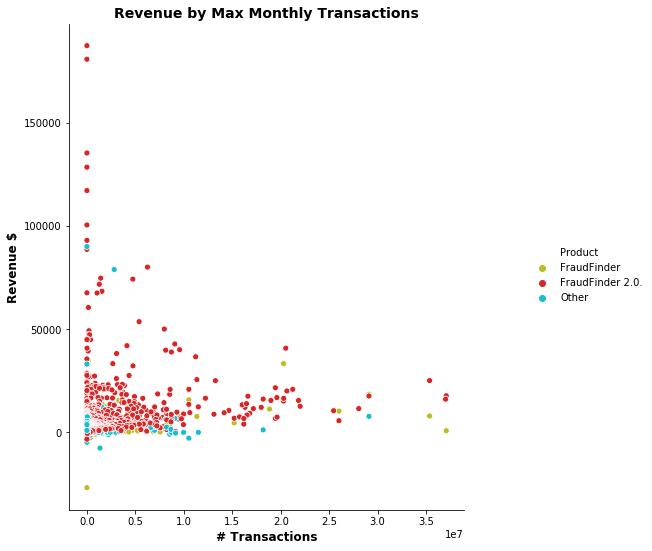

In [102]:
colors = ['tab:olive','tab:red','tab:cyan']
sns.set_palette(colors)

sns.relplot(y='Revenue', x='# Transactions', data=df3, hue='Product')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title(f"Revenue by Max Monthly Transactions", fontsize=14, fontweight='bold')
plt.xlabel('# Transactions', fontsize=12, fontweight='bold')
plt.ylabel('Revenue $', fontsize=12, fontweight='bold')

plt.savefig('rev_x_transact.png')

In [100]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df3['# Transactions'], df3['Revenue'])
s_stats = f'Slope: {slope}. Intercept: {intercept}. R: {r_value}. P: {p_value}. SE: {std_err}'
s_stats

'Slope: 0.0006695870796992741. Intercept: 2425.0956383621347. R: 0.21855581034710087. P: 3.8323979285362413e-70. SE: 3.7355696367712304e-05'

In [46]:
df3 = df3.loc[df3['# Transactions'] != 0]
df_ff2 = df3.loc[df3['Product'] == 'FraudFinder 2.0.']
df_ff = df3.loc[df3['Product'] == 'FraudFinder']
df_o = df3.loc[df3['Product'] == 'Other']

No handles with labels found to put in legend.


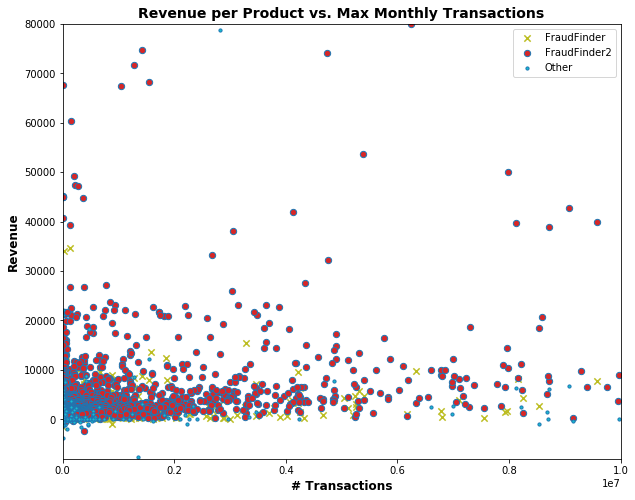

In [405]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'ylim':(-8000,80000), 'xlim':(0,10000000)})
plt.xlabel('Transactions', fontsize=12, fontweight='bold')
plt.ylabel('Revenue', fontsize=12, fontweight='bold')
plt.title(f"Revenue per Product vs. Max Monthly Transactions", fontsize=14, fontweight='bold')
plt.legend(loc='best')
df_ff.plot(ax=ax, kind="scatter", grid=False, x='# Transactions',y="Revenue", s=40, color="tab:olive", edgecolors="tab:blue", marker='x', label='FraudFinder')
df_ff2.plot(ax=ax, kind="scatter", grid=False, x='# Transactions',y="Revenue", s=40, color="tab:red", edgecolors="tab:blue", marker='o', label='FraudFinder2')
df_o.plot(ax=ax, kind="scatter", grid=False, x='# Transactions',y="Revenue", s=40, color="tab:cyan", edgecolors="tab:blue", marker='.', label='Other')
plt.savefig('revtrans.png')